<h1 align='center'>Wine Quality Analysis</h1>
<img src='wines.jpg' width="500"></img>

<h1>Summary</h1>

    1. Introduction
    2. Description of the data
    3. Objective
    4. Methodology
    5. Data pre-processing
        5.1) Exploratory analysis
        5.2) Outliers
    6. Predictive analysis
        6.1) Predicting wine type
            6.1.1) Conclusions
        6.2) Predicting wine score
            6.2.1) Leading with imbalanced classes
            6.2.2) Conclusions
    7. Discussion

<h1>1. Introduction</h1>

Wine is milenar beverage whose first registers come from ancient China (c. 7000 BC), Georgia (c. 6000 BC), Iran (Persia) (c. 5000 BC) and Sicily (c. 4000 BC). It's a fermented alcoholic drink produced by yeasts that consume the sugar in grape juice. There are different types of wine, which include red, white and rosé. These variations are results of biochemical reactions in different grape qualities <a href='https://en.wikipedia.org/wiki/Wine'>[1]</a>.

<h1>2. Description of the data</h1>

In this report we are going to use two datasets available at <a href='https://archive.ics.uci.edu/ml/datasets/Wine'>UCI Machine Learning Repository</a>. These datasets contain information of red and white variantes of the portuguese "Vinho Verde" wine <a href='https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377'>[2]</a>. There are 12 columns corresponding to physicochemical and sensory variables. Due to privacy issues, there is no information about grape types, prices, wine brands, etc. The features are listed below:

    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    12 - quality

<h1>3. Objective</h1>

The main goals of this report are:

      i) explore data;
     ii) create a machine learning model to predict if the wine is red or white;
    iii) create a machine learning model to predict the wine quality.

It's worth noting that, in both predict analysis we have a classification task to develop. In ii), we are dealing with a binary classification (red or white wine) and in iii) we have a multi-class problem ("quality" is a score ranging from 0 to 10).

<h1>4. Methodology</h1>

We are going to study the dataset doing first a pre-processing, which consists of cleaning and identifying outliers, followed by the exploration of data, constructing plots to get insight. After that, we can prepare our data, applying an appropriate scaling and analysing if our dataset is imbalanced or not. After that, we will be able to apply machine learning models to make the predictions.

# 5. Data pre-processing

In [1]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5

# Importing machine learning models for classification, metrics, classification report
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing datasets
df_red = pd.read_csv("winequality-red.csv", delimiter=';')
df_white = pd.read_csv("winequality-white.csv", delimiter=';')

In [3]:
# Red wine dataset
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# White wine dataset
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Verifying shapes
df_red.shape, df_white.shape

((1599, 12), (4898, 12))

In [6]:
# Creating columns for each type of wine
df_red['Type'] = 'Red'
df_white['Type'] = 'White'

In [7]:
# Now we can create the full dataset concatenating the red and white wines datasets
df_wines = pd.concat([df_red, df_white], axis=0)
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [8]:
# New shape
df_wines.shape

(6497, 13)

In [9]:
# Columns
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type'],
      dtype='object')

In [10]:
# Let's rename some columns in order to ease data manipulation
df_wines.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_wines.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type'],
      dtype='object')

In [11]:
# Let's see the information
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


Here we can see the dataset has 0 non-null values. We have 13 columns: 12 are numerical features and one is categorical, which refers to the type of wine (red or white).

In [12]:
# Now, let's see a description of this dataset
df_wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


It seems our dataset has no apparently anomalies, such as negative density or pH, for example. It's interesting to note that the minimum and maximum quality are 3 and 9, respectively. That is, no wine received a score inferior to 3 and no wine was scored as "perfect" (quality = 10).

## 5.1) Exploratory analysis

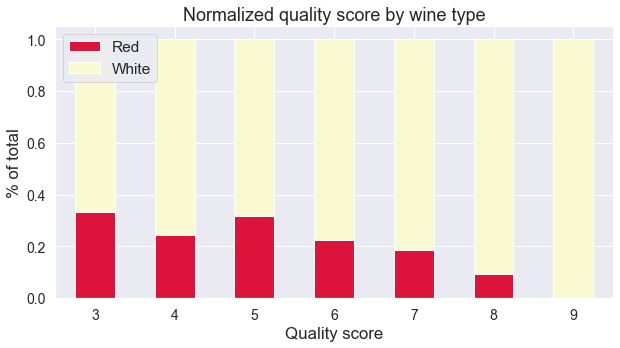

In [13]:
# wine types

colors = ['crimson', 'lightgoldenrodyellow']
sns.set(font_scale=1.4)
ct = pd.crosstab(df_wines['quality'], df_wines['Type'], normalize='index')
ct.plot.bar(stacked=True, rot=0, fontsize = 14, color = colors)
plt.title('Normalized quality score by wine type', fontsize = 18)
plt.ylabel('% of total')
plt.xlabel("Quality score")
plt.legend(loc='upper left')
plt.show()

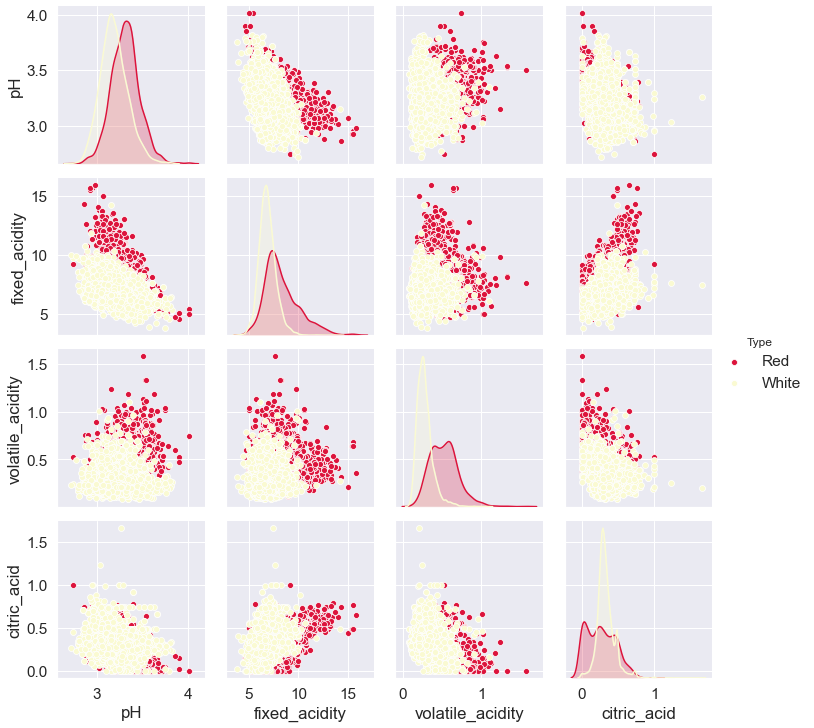

In [14]:
# Pair plots

df_acid = df_wines[['pH', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'Type']]
g = sns.pairplot(df_acid, hue="Type", palette=colors)

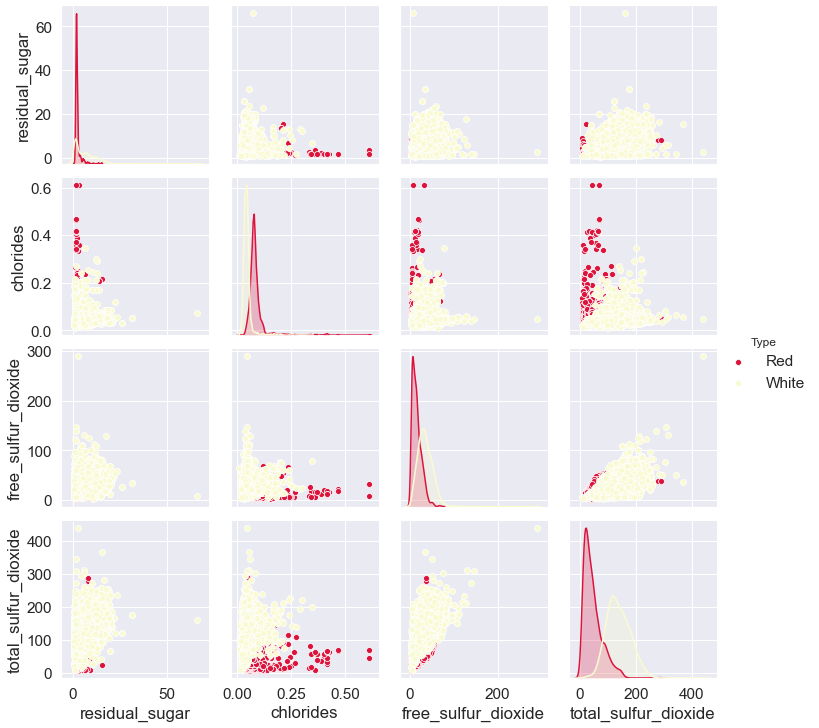

In [15]:
# Pair plots

df_feat2 = df_wines[['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'Type']]
g = sns.pairplot(df_feat2, hue="Type", palette=colors)

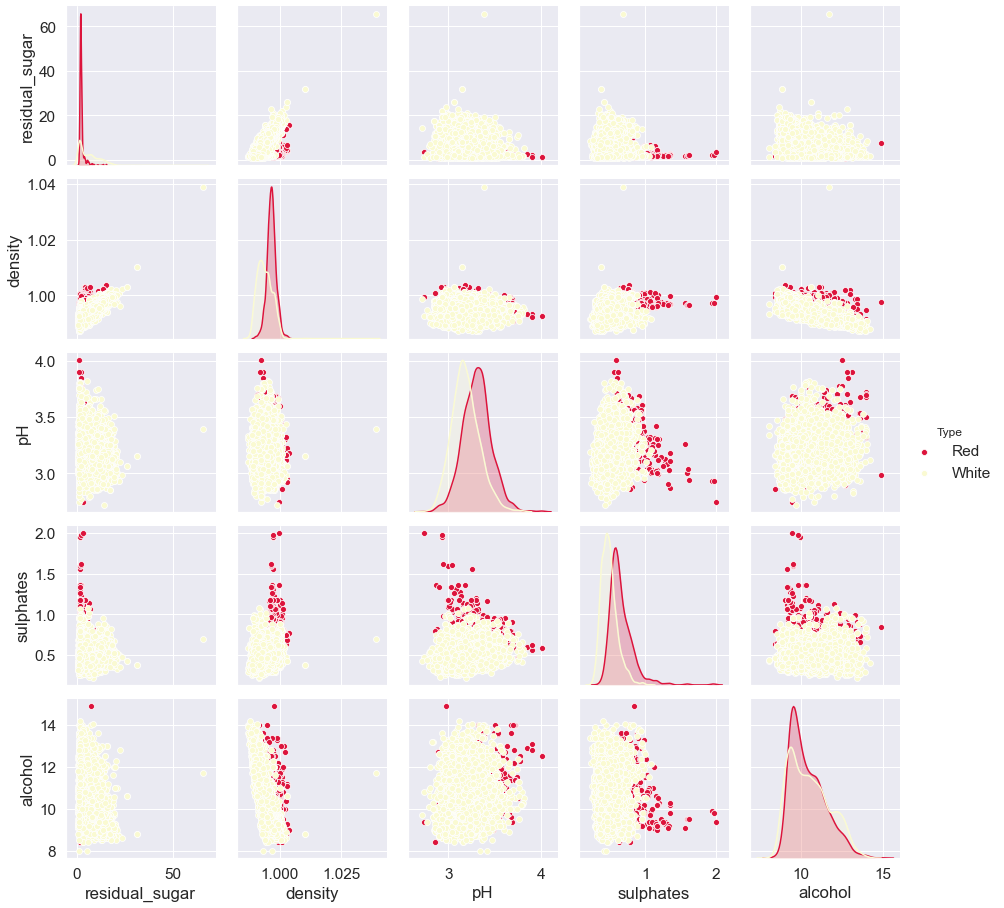

In [16]:
# Pair plots

df_feat3 = df_wines[['residual_sugar', 'density', 'pH', 'sulphates', 'alcohol', 'Type']]
g = sns.pairplot(df_feat3, hue="Type", palette=colors)

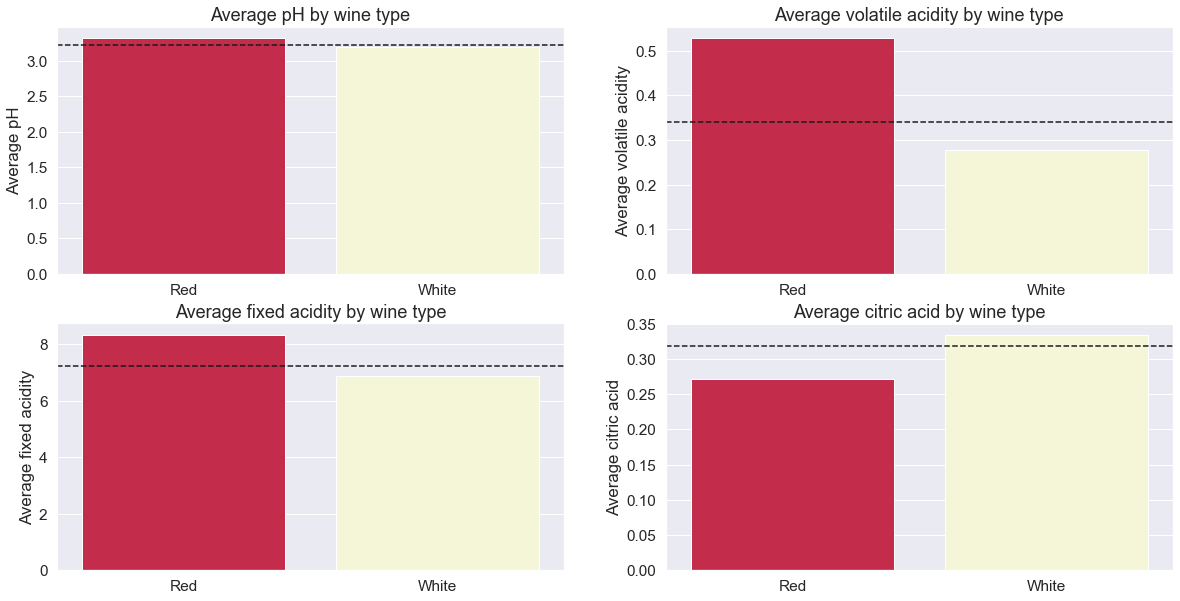

In [17]:
# Analysing average differences between red and white wines

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

# pH
sns.barplot(x = "Type", y = 'pH', data = df_wines, palette = colors, ci=None, ax=axes[0, 0])
mean1 = df_wines['pH'].mean()
axes[0, 0].set_title("Average pH by wine type", fontsize = 18)
axes[0, 0].axhline(y=mean1, color='k', linestyle='--')
axes[0, 0].set_ylabel("Average pH")
axes[0, 0].set_xlabel("")

# Fixed acidity
sns.barplot(x = "Type", y = 'fixed_acidity', data = df_wines, palette = colors, ci=None, ax=axes[1, 0])
mean2 = df_wines['fixed_acidity'].mean()
axes[1, 0].set_title("Average fixed acidity by wine type", fontsize = 18)
axes[1, 0].axhline(y=mean2, color='k', linestyle='--')
axes[1, 0].set_ylabel("Average fixed acidity")
axes[1, 0].set_xlabel("")

# Volatile acidity
sns.barplot(x = "Type", y = 'volatile_acidity', data = df_wines, palette = colors, ci=None, ax=axes[0, 1])
mean3 = df_wines['volatile_acidity'].mean()
axes[0 ,1].set_title("Average volatile acidity by wine type", fontsize = 18)
axes[0 ,1].axhline(y=mean3, color='k', linestyle='--')
axes[0 ,1].set_ylabel("Average volatile acidity")
axes[0 ,1].set_xlabel("")

# Citric acid
sns.barplot(x = "Type", y = 'citric_acid', data = df_wines, palette = colors, ci=None, ax=axes[1, 1])
mean4 = df_wines['citric_acid'].mean()
axes[1, 1].set_title("Average citric acid by wine type", fontsize = 18)
axes[1, 1].axhline(y=mean4, color='k', linestyle='--')
axes[1, 1].set_ylabel("Average citric acid")
axes[1, 1].set_xlabel("")

plt.show()

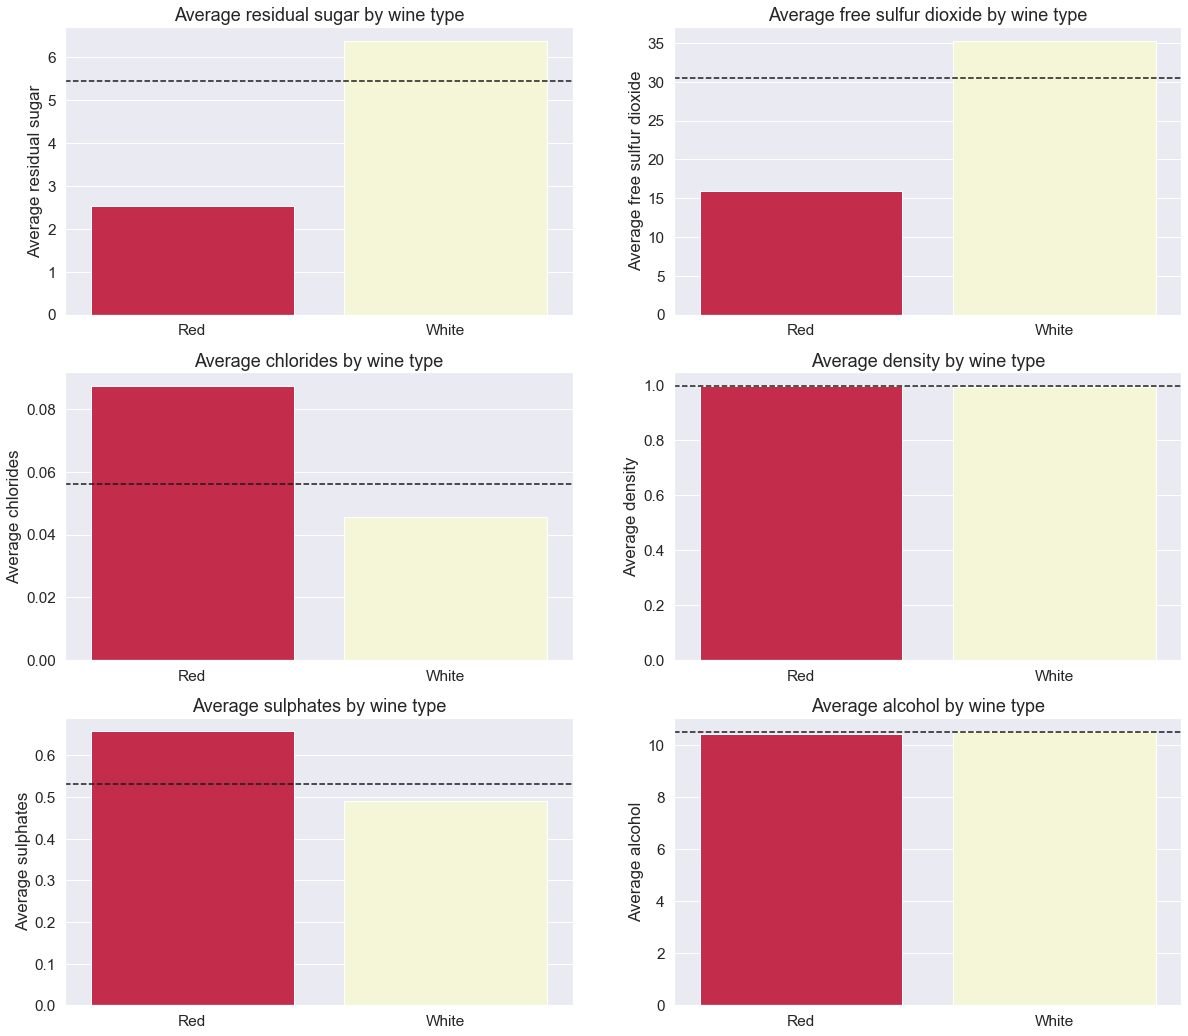

In [18]:
# Analysing differences between red and white wines

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20,18))

# Residual sugar
sns.barplot(x = "Type", y = 'residual_sugar', data = df_wines, palette = colors, ci=None, ax=axes[0, 0])
mean1 = df_wines['residual_sugar'].mean()
axes[0, 0].set_title("Average residual sugar by wine type", fontsize = 18)
axes[0, 0].axhline(y=mean1, color='k', linestyle='--')
axes[0, 0].set_ylabel("Average residual sugar")
axes[0, 0].set_xlabel("")

# Chlorides
sns.barplot(x = "Type", y = 'chlorides', data = df_wines, palette = colors, ci=None, ax=axes[1, 0])
mean2 = df_wines['chlorides'].mean()
axes[1, 0].set_title("Average chlorides by wine type", fontsize = 18)
axes[1, 0].axhline(y=mean2, color='k', linestyle='--')
axes[1, 0].set_ylabel("Average chlorides")
axes[1, 0].set_xlabel("")

# Free sulfur dioxide
sns.barplot(x = "Type", y = 'free_sulfur_dioxide', data = df_wines, palette = colors, ci=None, ax=axes[0, 1])
mean3 = df_wines['free_sulfur_dioxide'].mean()
axes[0 ,1].set_title("Average free sulfur dioxide by wine type", fontsize = 18)
axes[0 ,1].axhline(y=mean3, color='k', linestyle='--')
axes[0 ,1].set_ylabel("Average free sulfur dioxide")
axes[0 ,1].set_xlabel("")

# Density
sns.barplot(x = "Type", y = 'density', data = df_wines, palette = colors, ci=None, ax=axes[1, 1])
mean4 = df_wines['density'].mean()
axes[1, 1].set_title("Average density by wine type", fontsize = 18)
axes[1, 1].axhline(y=mean4, color='k', linestyle='--')
axes[1, 1].set_ylabel("Average density")
axes[1, 1].set_xlabel("")

# Sulphates
sns.barplot(x = "Type", y = 'sulphates', data = df_wines, palette = colors, ci=None, ax=axes[2, 0])
mean5 = df_wines['sulphates'].mean()
axes[2, 0].set_title("Average sulphates by wine type", fontsize = 18)
axes[2, 0].axhline(y=mean5, color='k', linestyle='--')
axes[2, 0].set_ylabel("Average sulphates")
axes[2, 0].set_xlabel("")

# Alcohol
sns.barplot(x = "Type", y = 'alcohol', data = df_wines, palette = colors, ci=None, ax=axes[2, 1])
mean6 = df_wines['alcohol'].mean()
axes[2, 1].set_title("Average alcohol by wine type", fontsize = 18)
axes[2, 1].axhline(y=mean6, color='k', linestyle='--')
axes[2, 1].set_ylabel("Average alcohol")
axes[2, 1].set_xlabel("")

plt.show()

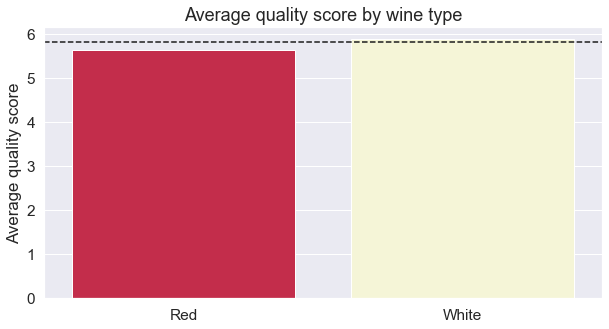

In [19]:
# Average quality score by wine type

mean = df_wines['quality'].mean()
ax = sns.barplot(x = "Type", y = 'quality', data = df_wines, palette = colors, ci=None)
ax.set_title("Average quality score by wine type", fontsize = 18)
plt.axhline(y=mean, color='k', linestyle='--')
plt.ylabel("Average quality score")
plt.xlabel("")
plt.show()

**Preliminary conclusions:**
    
    1. Red wines have volatitle acidity, fixed acidity, chlorides and sulphates above average.
    2. White wines have citric acid, residual sugar and free sulfur dioxide above average.
    3. As regarding pH, density, alcohol and quality score, both wines are close to each other, in average.

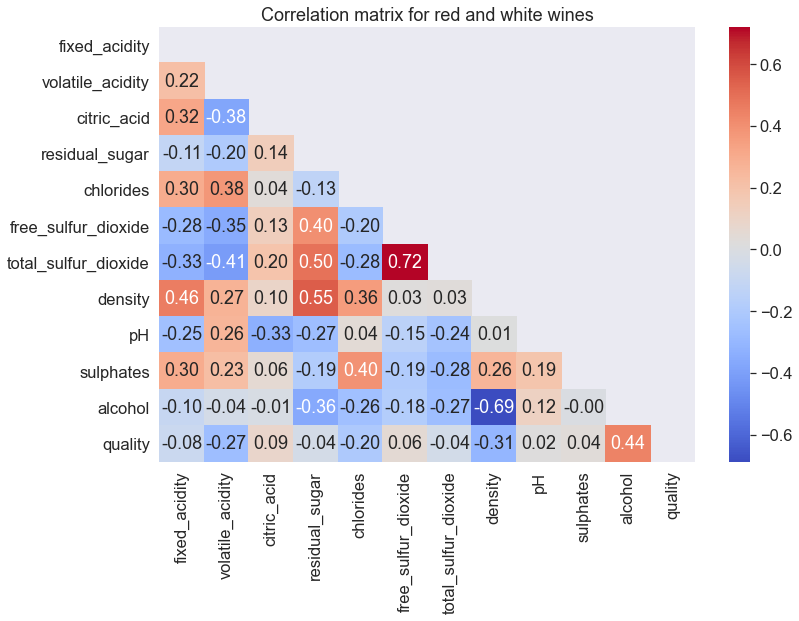

In [73]:
# Pearson correlation - captures the strength of linear relationship between two variables.
# Full dataset

corr_matrix = df_wines.corr()

plt.figure(figsize=(12,8))
plt.title("Correlation matrix for red and white wines")
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap = "coolwarm", annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

**Preliminary conclusions:**
    
    1. There is strong positive correlation between total sulfur dioxide and free sulfur dioxide.
    2. The density has moderate positive correlation with residual sugar and high negative correlation with alcohol.
    3. The residual sugar has moderate positive correlation with total sulfur dioxide.

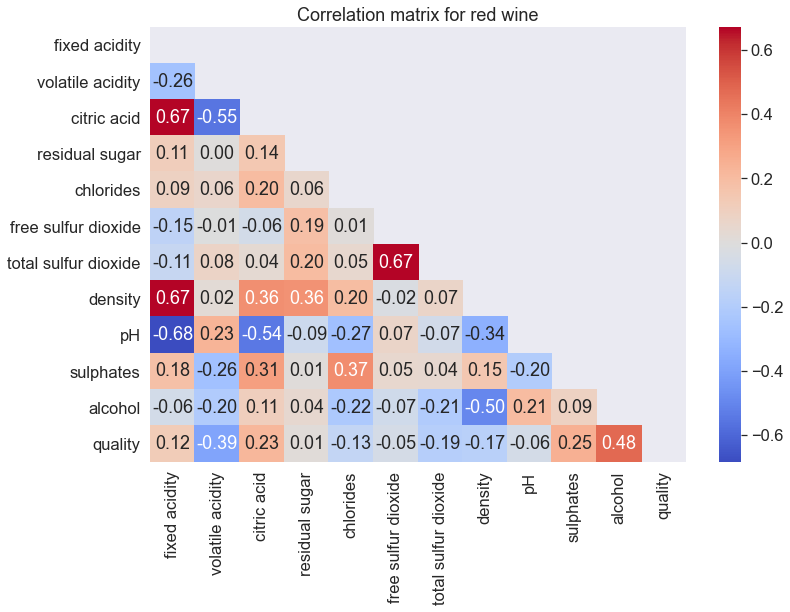

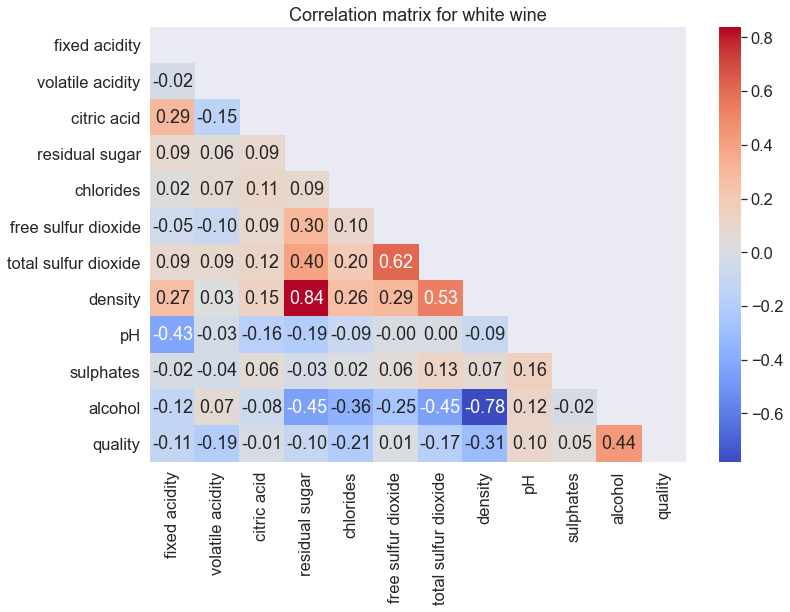

In [74]:
# Pearson correlation - RED

corr_red = df_red.corr()

plt.figure(figsize=(12,8))
plt.title("Correlation matrix for red wine")
dropSelf = np.zeros_like(corr_red)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_red, cmap = "coolwarm", annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

# Pearson correlation - WHITE

corr_white = df_white.corr()

plt.figure(figsize=(12,8))
plt.title("Correlation matrix for white wine")
dropSelf = np.zeros_like(corr_white)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_white, cmap = "coolwarm", annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

**For red wines, we can see that:**
    
    1. Fixed acidity shows strong positive correlation with citric acid and density for red wines and strong negative correlation with pH.
    2. Total sulfur dioxide has strong positive correlation with free sulfur dioxide.
    3. Alcohol has moderate negative correlation with density.

**For white wines, we can see that:**

    1. Density has strong positive correlation with residual sugar and moderate positive correlation with total sulfur dioxide.
    2. Alcohol has strong negative correlation with density
    3. Total sulfur dioxide has moderate positive correlation with free sulfur dioxide.

## 5.2) Outliers

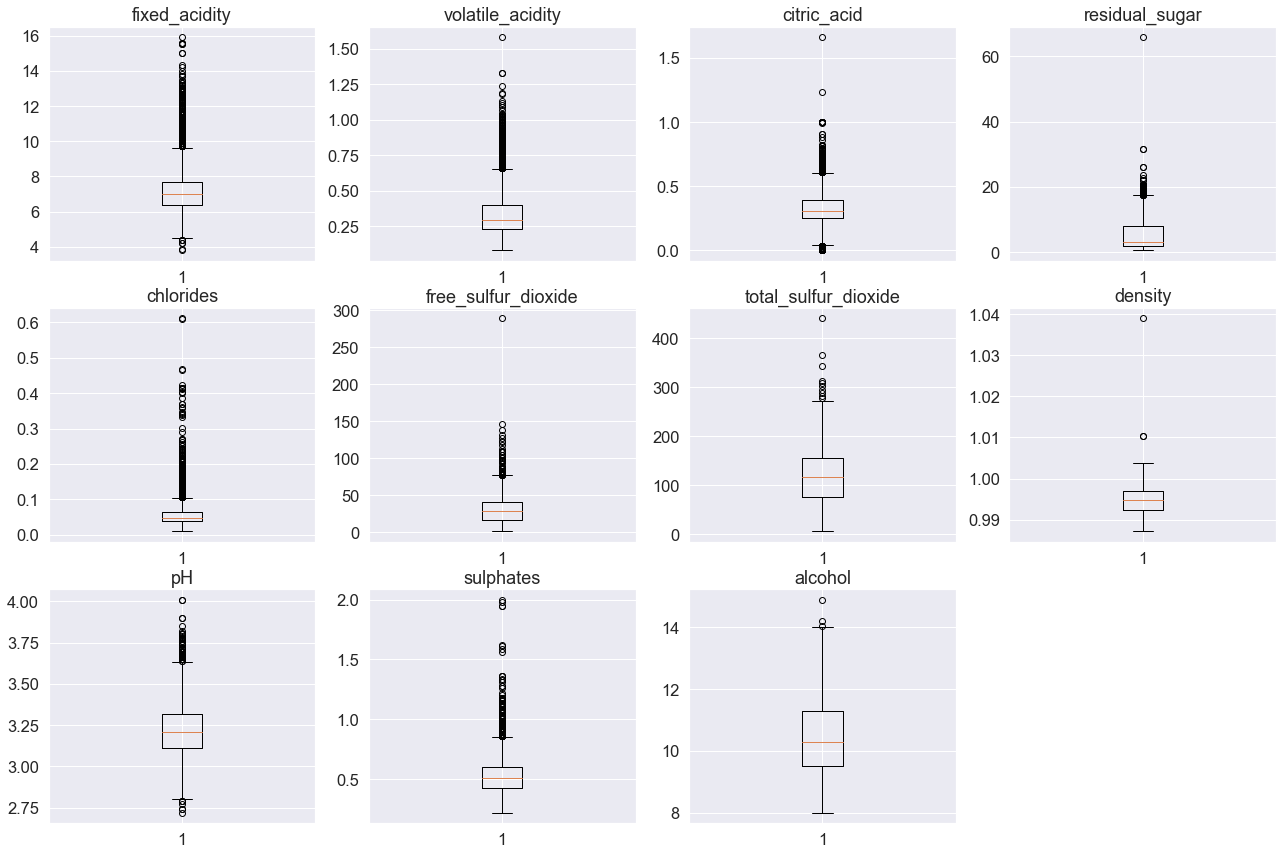

In [22]:
# Boxplots in order to view possible outliers

features = list(df_wines.columns)

plt.figure(figsize = (22,25))

for i in range(0, 11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_wines[features[i]])
    plt.title(features[i])

In [23]:
# Calculating outliers. We will remove values upper to 3 standard deviation

upper = list()

for i in range(0,11):
        upper_limit = df_wines[features[i]].mean() + 3*df_wines[features[i]].std()
        upper.append(upper_limit)

In [24]:
# Defining new dataframe
new_dataframe = pd.DataFrame()

# Removing outliers 
def remove_outliers(data, columns):
    for i in range(0,11):
        data = data[data[columns[i]] < upper[i]]
        new_dataframe = data
    return new_dataframe

In [25]:
# New dataframe - after removing outliers
df_wines_clean = remove_outliers(df_wines, features)
df_wines_clean.shape

(6010, 13)

# 6. Predictive analysis

## 6.1) Predicting wine type

In [26]:
# Separating features, X, and target, y. Here, our target is the column type we have created
X = df_wines_clean.drop('Type', axis = 1)
y = df_wines_clean['Type']

In [27]:
# Normalizing and saving in the new dataset 'df_minmax'

minmax_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df_minmax = minmax_scaler.fit_transform(X)

# Transforming into dataframe
df_minmax = pd.DataFrame(df_minmax, columns = X.columns)

# Visualizing
df_minmax.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.486111,0.826667,0.000000,0.068783,0.440789,0.121951,0.101449,0.690123,0.806122,0.453333,0.231405,0.333333
1,0.541667,0.906667,0.054054,0.089947,0.546053,0.170732,0.173913,0.638476,0.551020,0.573333,0.297521,0.333333
2,0.486111,0.826667,0.000000,0.068783,0.440789,0.121951,0.101449,0.690123,0.806122,0.453333,0.231405,0.333333


In [28]:
# Defining function to calculate the feature importances based on ExtraTreesClassifier

def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances


# Applying function
variables, importances = etc_importances(X, y)

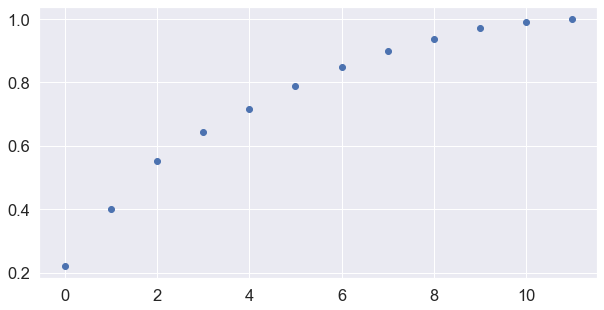

In [29]:
# Defining function to calculate the cumulative sum of variable 'importances'

def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum()
    this_variable = pd.Series([variables[i], sum_importance])
    sum_importances = sum_importances.append(this_variable, ignore_index = True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances


# Applying function
sum_importances = sum_and_plot_importances(variables, importances)

In [30]:
# Defining function to keep only the more important features

def keep_vars(features, sum_importances, threshold):
  keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
  features = features.loc[:, keep_vars]
  
  return features

# Applying function
X = keep_vars(X, sum_importances, threshold = 0.95)
X.shape

(6010, 9)

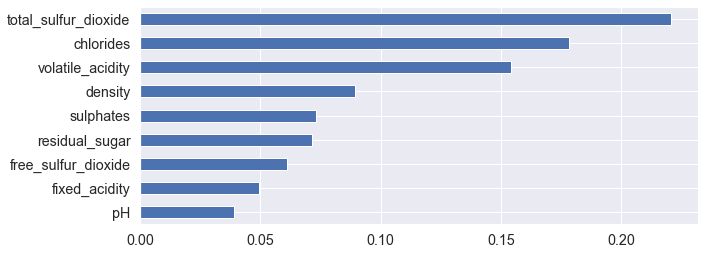

In [31]:
# Calculating feature importances

sns.set(font_scale=1.3)
feat_importances = pd.Series(importances[0:X.shape[1]], index = X.columns)
feat_sorted = feat_importances.sort_values()

# Plotting
fig = plt.figure(figsize=(10,4))
feat_sorted.plot(kind='barh')
plt.show()

In [32]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Random Forest classifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12]
}

rfc = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [34]:
# Defining model with the best parameters
best_rf_grid = rf_grid.best_estimator_

# Classification report
predicted = best_rf_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Red       1.00      0.96      0.98       242
       White       0.99      1.00      1.00       960

    accuracy                           0.99      1202
   macro avg       1.00      0.98      0.99      1202
weighted avg       0.99      0.99      0.99      1202



In [35]:
# Create a based model using Gradient Boosting Classifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate':[0.01, 0.05, 0.1]
}


gbc = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

gb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.6s finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [36]:
# Defining model with the best parameters
best_gb_grid = gb_grid.best_estimator_

# Classification report
predicted = best_gb_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Red       1.00      0.97      0.98       242
       White       0.99      1.00      1.00       960

    accuracy                           0.99      1202
   macro avg       0.99      0.99      0.99      1202
weighted avg       0.99      0.99      0.99      1202



In [37]:
# Create a based model of Support Vector Machine for Classification
param_grid = {
    'kernel': ['linear', 'rbf', 'poly']
}


svc = SVC()
sv_grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

sv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf', 'poly']}, verbose=1)

In [38]:
# Defining model with the best parameters
best_sv_grid = sv_grid.best_estimator_

# Classification report
predicted = best_sv_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Red       0.98      0.96      0.97       242
       White       0.99      1.00      0.99       960

    accuracy                           0.99      1202
   macro avg       0.99      0.98      0.98      1202
weighted avg       0.99      0.99      0.99      1202



In [39]:
# Create a based model of Logistic Regression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()
lr_grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1)

In [40]:
# Defining model with the best parameters
best_lr_grid = lr_grid.best_estimator_

# Classification report
predicted = best_lr_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Red       0.97      0.93      0.95       242
       White       0.98      0.99      0.99       960

    accuracy                           0.98      1202
   macro avg       0.98      0.96      0.97      1202
weighted avg       0.98      0.98      0.98      1202



In [41]:
# Create a based model of KNN
param_grid = {'n_neighbors': list(range(1,20)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:   10.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [42]:
# Defining model with the best parameters
best_knn_grid = knn_grid.best_estimator_

# Classification report
predicted = best_knn_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         Red       0.92      0.83      0.87       242
       White       0.96      0.98      0.97       960

    accuracy                           0.95      1202
   macro avg       0.94      0.90      0.92      1202
weighted avg       0.95      0.95      0.95      1202



### 6.1.1) Conclusion

Analyzing the classification report of each model we can see that the Random Forest, Gradient Boosting and Support Vector Machine models performed very well in distinguishing the type class, red or white. They obtained high values of precision, recall and f1-score (superior to 0.96). The Logistic Regression also performed well, but showed lower values in the three metrics compared to previous models. The KNN had a good performance as well, although it had the lowest score in relation to all models used.

## 6.2) Predicting wine score

In [43]:
# Counting how many scores are registered in the dataset.

score3 = round(df_wines_clean.quality.value_counts()[3]*100/len(df_wines),2)
score4 = round(df_wines_clean.quality.value_counts()[4]*100/len(df_wines),2)
score5 = round(df_wines_clean.quality.value_counts()[5]*100/len(df_wines),2)
score6 = round(df_wines_clean.quality.value_counts()[6]*100/len(df_wines),2)
score7 = round(df_wines_clean.quality.value_counts()[7]*100/len(df_wines),2)
score8 = round(df_wines_clean.quality.value_counts()[8]*100/len(df_wines),2)
score9 = round(df_wines_clean.quality.value_counts()[9]*100/len(df_wines),2)

print('In this dataset', str(score3) + '% had score 3,', str(score4) + '% had score 4,', str(score5) + '% had score 5,',
     str(score6) + '% had score 6,', str(score7) + '% had score 7,', str(score8) + '% had score 8 and', 
     str(score9) + '% had score 9.')

In this dataset 0.23% had score 3, 2.83% had score 4, 30.14% had score 5, 40.59% had score 6, 15.81% had score 7, 2.83% had score 8 and 0.08% had score 9.


So we can see that our dataset is very imbalanced specially in the high and low scores. In order to see how our model predicts this classes, let's apply the Random Forest and the Gradient Boosting as examples, and then we will use the oversampling technique in order to test if our model gets better results.

In [44]:
df = pd.get_dummies(df_wines_clean, columns=["Type"])
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Type_Red,Type_White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,0


In [45]:
# Separating features, X, and target, y. Here, our target is the column quality (multi-class)

X = df.drop('quality', axis = 1)
y = df['quality']

In [46]:
# Normalizing and saving in the new dataset 'df_minmax'

minmax_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df_minmax = minmax_scaler.fit_transform(X)

# Transforming into dataframe
df_minmax = pd.DataFrame(df_minmax, columns = X.columns)

# Visualizing
df_minmax.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Type_Red,Type_White
0,0.486111,0.826667,0.000000,0.068783,0.440789,0.121951,0.101449,0.690123,0.806122,0.453333,0.231405,1.0,0.0
1,0.541667,0.906667,0.054054,0.089947,0.546053,0.170732,0.173913,0.638476,0.551020,0.573333,0.297521,1.0,0.0
2,0.486111,0.826667,0.000000,0.068783,0.440789,0.121951,0.101449,0.690123,0.806122,0.453333,0.231405,1.0,0.0


In [47]:
X.shape, y.shape

((6010, 13), (6010,))

In [48]:
# Defining function to calculate the feature importances based on ExtraTreesClassifier

def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances


# Applying function
variables, importances = etc_importances(X, y)

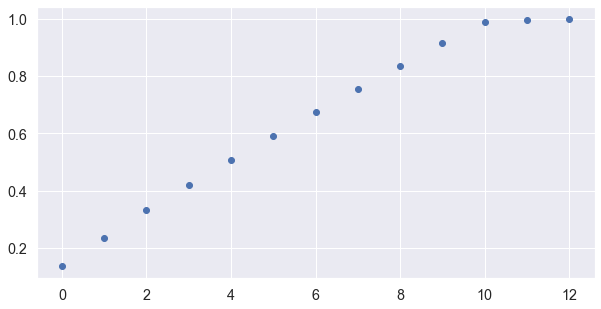

In [49]:
# Defining function to calculate the cumulative sum of variable 'importances'

def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum()
    this_variable = pd.Series([variables[i], sum_importance])
    sum_importances = sum_importances.append(this_variable, ignore_index = True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances


# Applying function
sum_importances = sum_and_plot_importances(variables, importances)

In [50]:
# Defining function to keep only the more important features

def keep_vars(features, sum_importances, threshold):
  keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
  features = features.loc[:, keep_vars]
  
  return features


# Applying function
X = keep_vars(X, sum_importances, threshold = 0.95)
X.shape

(6010, 10)

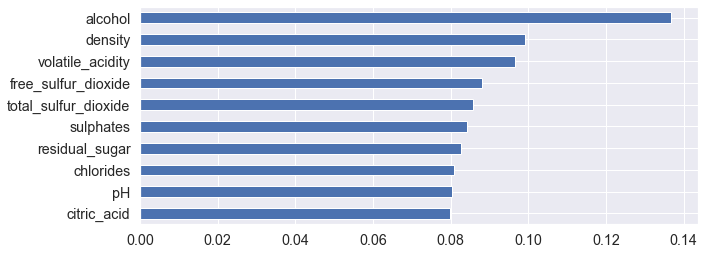

In [51]:
# Calculating feature importances

sns.set(font_scale=1.3)
feat_importances = pd.Series(importances[0:X.shape[1]], index = X.columns)
feat_sorted = feat_importances.sort_values()

# Plotting
fig = plt.figure(figsize=(10,4))
feat_sorted.plot(kind='barh')
plt.show()

In [52]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# Shape
X_train.shape, X_test.shape

((4808, 10), (1202, 10))

In [54]:
# Random Forest classifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12]
}

rfc = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [55]:
# Defining model with the best parameters

best_rf_grid = rf_grid.best_estimator_

# Classification report

predicted = best_rf_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.03      0.06        32
           5       0.68      0.71      0.70       374
           6       0.62      0.76      0.69       538
           7       0.62      0.45      0.52       205
           8       1.00      0.15      0.25        48
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1202
   macro avg       0.56      0.30      0.32      1202
weighted avg       0.66      0.65      0.62      1202



In [56]:
# Create a based model using Gradient Boosting Classifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate':[0.01, 0.05, 0.1]
}


gbc = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

gb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [57]:
# Defining model with the best parameters

best_gb_grid = gb_grid.best_estimator_

# Classification report

predicted = best_gb_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.30      0.09      0.14        32
           5       0.63      0.66      0.65       374
           6       0.59      0.70      0.64       538
           7       0.51      0.35      0.42       205
           8       0.60      0.25      0.35        48
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1202
   macro avg       0.38      0.29      0.31      1202
weighted avg       0.58      0.59      0.58      1202



In [58]:
# Create a based model of KNN
param_grid = {'n_neighbors': list(range(1,30)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 232 candidates, totalling 1160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1160 out of 1160 | elapsed:   15.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [59]:
# Defining model with the best parameters

best_knn_grid = knn_grid.best_estimator_

# Classification report

predicted = best_knn_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.06      0.12        32
           5       0.58      0.64      0.61       374
           6       0.60      0.72      0.66       538
           7       0.65      0.40      0.50       205
           8       1.00      0.42      0.59        48
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1202
   macro avg       0.55      0.32      0.35      1202
weighted avg       0.63      0.61      0.59      1202



### 6.2.1) Leading with imbalanced classes

The classification reports showed that our models could not predict the minority classes "3" and "9", because in both classes we got precision, recall and f1-score resulting in 0. On the other hand, the Random Forest and the KNN predicted scores "4" and "8" with high precision (= 1.0), but very low recall and f1-score, in the case of class "4". Classes "5", "6" and "7" had medium metric values. The Gradient Boosting had the "worst" performance.

These results show that, indeed, we are leading with the problem of imbalanced classes. In order to work around with this issue, we will do an oversampling to make the dataset more balanced.

In [60]:
# Starting counting classes
counter1 = Counter(y)
counter1.keys()
for key, value in counter1.items():
    ctx = (value)
    print('The number of registers in class', key, 'is', str(ctx) + '.')

The number of registers in class 5 is 1958.
The number of registers in class 7 is 1027.
The number of registers in class 4 is 184.
The number of registers in class 6 is 2637.
The number of registers in class 8 is 184.
The number of registers in class 3 is 15.
The number of registers in class 9 is 5.


In [61]:
# SMOTE technique
oversample = SMOTE(k_neighbors=1)

In [62]:
# Fitting
X, y = oversample.fit_resample(X, y)

In [63]:
# Starting counting classes
counter1 = Counter(y)
counter1.keys()
for key, value in counter1.items():
    ctx = (value)
    print('The number of registers in class', key, 'is', str(ctx) + '.')

The number of registers in class 5 is 2637.
The number of registers in class 7 is 2637.
The number of registers in class 4 is 2637.
The number of registers in class 6 is 2637.
The number of registers in class 8 is 2637.
The number of registers in class 3 is 2637.
The number of registers in class 9 is 2637.


In [64]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((14767, 10), (3692, 10))

In [65]:
# Create a based model of KNN
param_grid = {'n_neighbors': list(range(1,30)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

knn_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 232 candidates, totalling 1160 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1160 out of 1160 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [66]:
# Defining model with the best parameters

best_knn_grid = knn_grid.best_estimator_
best_knn_grid


# Classification report

predicted = best_knn_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       530
           4       0.92      1.00      0.96       527
           5       0.79      0.75      0.77       529
           6       0.76      0.60      0.67       526
           7       0.84      0.95      0.89       502
           8       0.96      1.00      0.98       551
           9       0.99      1.00      1.00       527

    accuracy                           0.90      3692
   macro avg       0.89      0.90      0.89      3692
weighted avg       0.89      0.90      0.89      3692



In [67]:
# Random Forest classifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12]
}

rfc = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [68]:
# Defining model with the best parameters

best_rf_grid = rf_grid.best_estimator_
best_rf_grid

# Classification report

predicted = best_rf_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       530
           4       0.91      0.99      0.94       527
           5       0.78      0.78      0.78       529
           6       0.75      0.58      0.65       526
           7       0.79      0.89      0.84       502
           8       0.96      0.97      0.96       551
           9       1.00      1.00      1.00       527

    accuracy                           0.89      3692
   macro avg       0.88      0.89      0.88      3692
weighted avg       0.88      0.89      0.88      3692



In [69]:
# Create a based model using Gradient Boosting Classifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate':[0.01, 0.05, 0.1]
}


gbc = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

gb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.8min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [70]:
# Defining model with the best parameters

best_gb_grid = gb_grid.best_estimator_

# Classification report

predicted = best_gb_grid.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       530
           4       0.79      0.90      0.84       527
           5       0.64      0.62      0.63       529
           6       0.56      0.40      0.47       526
           7       0.60      0.68      0.63       502
           8       0.83      0.87      0.85       551
           9       1.00      1.00      1.00       527

    accuracy                           0.78      3692
   macro avg       0.77      0.78      0.77      3692
weighted avg       0.77      0.78      0.77      3692



### 6.2.2) Conclusions

After applying the oversampling technique, we can see in the classification reports that the three models used (KNN, Random Forest and Gradient Boosting) improved considerably in performance. In all cases the precision, recall and f1-score are higher when compared to the imbalanced case; the model can now predicted the classes "3" and "9" very well, which had had the worst results previously. 

Although we have apparently resolved the "imbalanced problem", these results can be acctually a consequence of overfitting. If we go back to the number of registers in each class before oversampling, we see that the minority classes "3" and "9" had 15 and 5 registers, respectively, while class "6" had 2637 registers. The SMOTE (Synthetic Minority Oversampling TEchnique) function selects examples close in our feature space and then creates new samples. In the case considered in this report, the SMOTE function by default resamples all classes, except the majority class. As a consequence, all classes have now the same number of the majority class (2637 registers). This is a considerably increase in the minority class, which can explains a possible overfitting.

# 7. Discussion

In section _6.1) Predicting wine type_ we conclude that the Random Forest, Gradient Boosting and Support Vector Machine models performed very well in distinguishing the type class, red or white. They obtained high values of precision, recall and f1-score (superior to 0.96). The Logistic Regression also performed well, but showed lower values in the three metrics compared to previous models. The KNN had a good performance as well, although it had the lowest score in relation to all models used.

In section _6.2) Predicting wine quality_ the results showed that we were leading with imbalanced classes. To solve this issue, we applied the SMOTE function, which is a oversampling technique. Our models improved considerably in performance, but these results could be a consequence of overfitting. To further analyze this behavior, one could, for example, create less samples of the minority class. Another interesting approach could be create three classes of quality, such as "low", "medium" and "high", decreasing the number of classes to predict. 

In a second part of this problem we can go deep into these details and analyze if we improve our predictions.